### CSE 574 Assignment 3
Apply clustering algorithms to the Iris dataset to explore patterns and potentially identify natural groupings of iris flowers based on their measurements. (100 points)

The species of iris plants based on their features.
1. Iris Serosa
2. Iris Versicolor
3. Iris Virginica 

### NOTE: All of the observations are included in the pdf report. This is just code and plots

Imported necessary packages and loaded the Iris dataset

### 1. Load the and Explore the Dataset: (1 point)

a. Load the Iris dataset from the `sklearn.datasets` module

In [175]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import packages
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Loading Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

b. Display basic information about the dataset (e.g., number of samples, features, target
classes).

In [176]:
print("Number of Samples:", X.shape[0]) 
print("Number of Features:", X.shape[1])
print("Feature Names:", iris.feature_names)
print("Number of Classes:", len(np.unique(y)))
print("Target Classes:", iris.target_names)
species_counts = pd.Series(iris.target_names[iris.target]).value_counts()
print(", ".join(f"{index}: {value} samples" for index, value in species_counts.items()))

Number of Samples: 150
Number of Features: 4
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Number of Classes: 3
Target Classes: ['setosa' 'versicolor' 'virginica']
setosa: 50 samples, versicolor: 50 samples, virginica: 50 samples


### 2. Data Preprocessing: (assignment 2 code can be used) (1 point)
As a part of preprocessing, a check for missing values was made were no mising values found in the dataset [Note: Iris dataset has no missing values]. Although there was no missing values, a common step to remove any missing values data was performed.

In [177]:
df = pd.DataFrame(X, columns = iris.feature_names)
print("Missing Values:\n", df.isnull().sum()) # Missing values
df.dropna(inplace=True) # Remove missing values
preprocessed_df = df.values # Back to Numpy after preprocessing

Missing Values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


Scaling the features for better clustering performance.

In [178]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to a DataFrame
scaled_iris_df = pd.DataFrame(X_scaled, columns=iris.feature_names)

# Display scaled data
print("After Standard Scaling:")
print(scaled_iris_df.head())

After Standard Scaling:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667


Iris dataset is alomost clean and doesnt contain contain any significant outliers. K-means and DBSCAN mainly rely on the Euclidean distance, therefore it will keep the features in the limited range

Last entries of the DataFrame

In [179]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


### 3. Clustering Algorithms: (18 points for report))
### e. Clustering algorithms to apply:

### i. K-means Clustering

In [180]:
k_values = [2, 3, 4, 5, 6]
k_means_results = {}
inertia_scores = {}

for k in k_values:
    k_means = KMeans(n_clusters = k, random_state = 42)
    k_means_labels = k_means.fit_predict(X_scaled)
    k_means_results[k] = k_means_labels
    inertia_scores[k] = k_means.inertia_

### ii. Hierarchical clustering (Agglomerative clustering) - self learn


In [181]:
linkage = ['single', 'average', 'complete', 'ward']
hier_results = {}

for method in linkage:
    hier = AgglomerativeClustering(n_clusters = 3, linkage = method)
    hier_labels = hier.fit_predict(X_scaled)
    hier_results[method] = hier_labels

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise) – selflearn

In [182]:
eps_values = np.arange(0.1, 0.6, 0.1)
min_values = range(2, 7)
dbscan_results = {}

for eps in eps_values:
    for min_samples in min_values:
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        dbscan_labels = dbscan.fit_predict(X_scaled)
        dbscan_results[(eps, min_samples)] = dbscan_labels

### 5. Evaluation: (10 + 10 points)

h. Evaluate the quality of clustering using metrics like silhouette score (self-learn, you can
also use inertia and Dunn index taught in class) and visual inspection:

i. Silhouette score: a higher score indicates better-defined clusters.

### Silhouette Scores:

### K-means (with inertia)

In [183]:
kmeans_silhouette_scores = {}

for k, labels in k_means_results.items():
    silhouette_score_kmeans = silhouette_score(X_scaled, labels)
    kmeans_silhouette_scores[k] = silhouette_score_kmeans

print("K-Means Silhouette Scores and inertia for five k values:")
for k in k_values:
    print(f"\nk = {k}: Silhouette Score = {kmeans_silhouette_scores[k]:.3f}")
    print(f"K-Means inertia = {inertia_scores[k]:.3f}")

K-Means Silhouette Scores and inertia for five k values:

k = 2: Silhouette Score = 0.630
K-Means inertia = 12.128

k = 3: Silhouette Score = 0.505
K-Means inertia = 6.982

k = 4: Silhouette Score = 0.445
K-Means inertia = 5.517

k = 5: Silhouette Score = 0.353
K-Means inertia = 4.581

k = 6: Silhouette Score = 0.355
K-Means inertia = 3.976


### Hierarchical clustering (Agglomerative)

In [184]:
hier_silhouette_scores_ = {}

for method, labels in hier_results.items():
    score = silhouette_score(X_scaled, labels)
    hier_silhouette_scores_[method] = score

print("Agglomerative Silhouette Scores for different linkages:\n")
for method in linkage:
    print(f"Linkage = {method}: Silhouette Score = {hier_silhouette_scores_[method]:.3f}")

Agglomerative Silhouette Scores for different linkages:

Linkage = single: Silhouette Score = 0.532
Linkage = average: Silhouette Score = 0.505
Linkage = complete: Silhouette Score = 0.504
Linkage = ward: Silhouette Score = 0.505


### DBSCAN 

In [185]:
dbscan_silhouette_scores_ = {}

for params, labels in dbscan_results.items():
    if len(set(labels)) > 1:
        score = silhouette_score(X_scaled, labels)
        dbscan_silhouette_scores_[params] = score

print("DBSCAN Silhouette Scores with different eps and min samples:\n")
for params in dbscan_results:
    if params in dbscan_silhouette_scores_:
        print(f"eps = {params[0]:.1f}, min_samples = {params[1]}: Silhouette Score = {dbscan_silhouette_scores_[params]:.3f}")

DBSCAN Silhouette Scores with different eps and min samples:

eps = 0.1, min_samples = 2: Silhouette Score = 0.230
eps = 0.1, min_samples = 3: Silhouette Score = 0.203
eps = 0.1, min_samples = 4: Silhouette Score = 0.134
eps = 0.1, min_samples = 5: Silhouette Score = 0.057
eps = 0.1, min_samples = 6: Silhouette Score = 0.057
eps = 0.2, min_samples = 2: Silhouette Score = 0.390
eps = 0.2, min_samples = 3: Silhouette Score = 0.556
eps = 0.2, min_samples = 4: Silhouette Score = 0.556
eps = 0.2, min_samples = 5: Silhouette Score = 0.556
eps = 0.2, min_samples = 6: Silhouette Score = 0.556
eps = 0.3, min_samples = 2: Silhouette Score = 0.630
eps = 0.3, min_samples = 3: Silhouette Score = 0.630
eps = 0.3, min_samples = 4: Silhouette Score = 0.468
eps = 0.3, min_samples = 5: Silhouette Score = 0.468
eps = 0.3, min_samples = 6: Silhouette Score = 0.468
eps = 0.4, min_samples = 2: Silhouette Score = 0.630
eps = 0.4, min_samples = 3: Silhouette Score = 0.630
eps = 0.4, min_samples = 4: Silhouett

### Visualization:

j. Visualize clusters using scatter plots or other appropriate visualizations. Write observations along with visualization in report.

### Plots:

### K-means

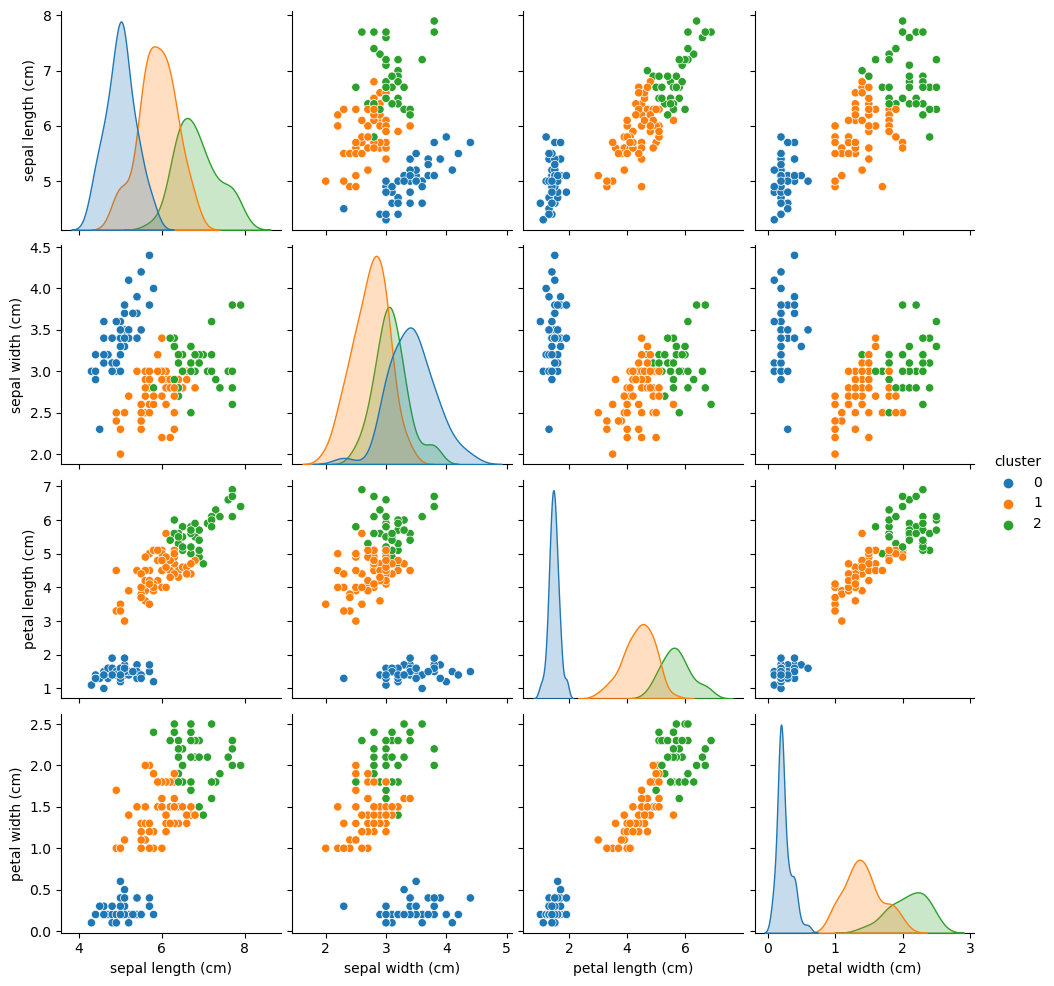

In [186]:
k_means = KMeans(n_clusters = 3, random_state = 42) # n_cluster = 3 is more appropriate because it is iris dataset and low inertia
k_means_labels = k_means.fit_predict(X_scaled)

df['cluster'] = pd.Categorical(k_means_labels)

# Visualizing the clusters using pairplot
sns.pairplot(df, hue='cluster')
plt.show()

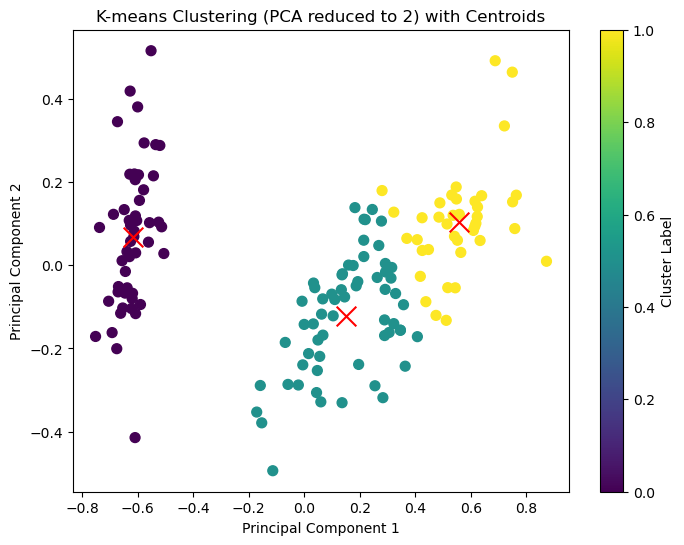

In [187]:
# Plot the clustered data (PCA reduced to 2)
pca = PCA(n_components = 2)
pca_reduced = pca.fit_transform(X_scaled)

# Centroids
centroids = k_means.cluster_centers_
pca_centroids = pca.transform(centroids)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(pca_reduced[:, 0], pca_reduced[:, 1], c = k_means_labels, cmap='viridis', s = 50)
plt.scatter(pca_centroids[:, 0], pca_centroids[:, 1], marker='x', s=200, c='red')
plt.title('K-means Clustering (PCA reduced to 2) with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

### Agglomerative Clustering

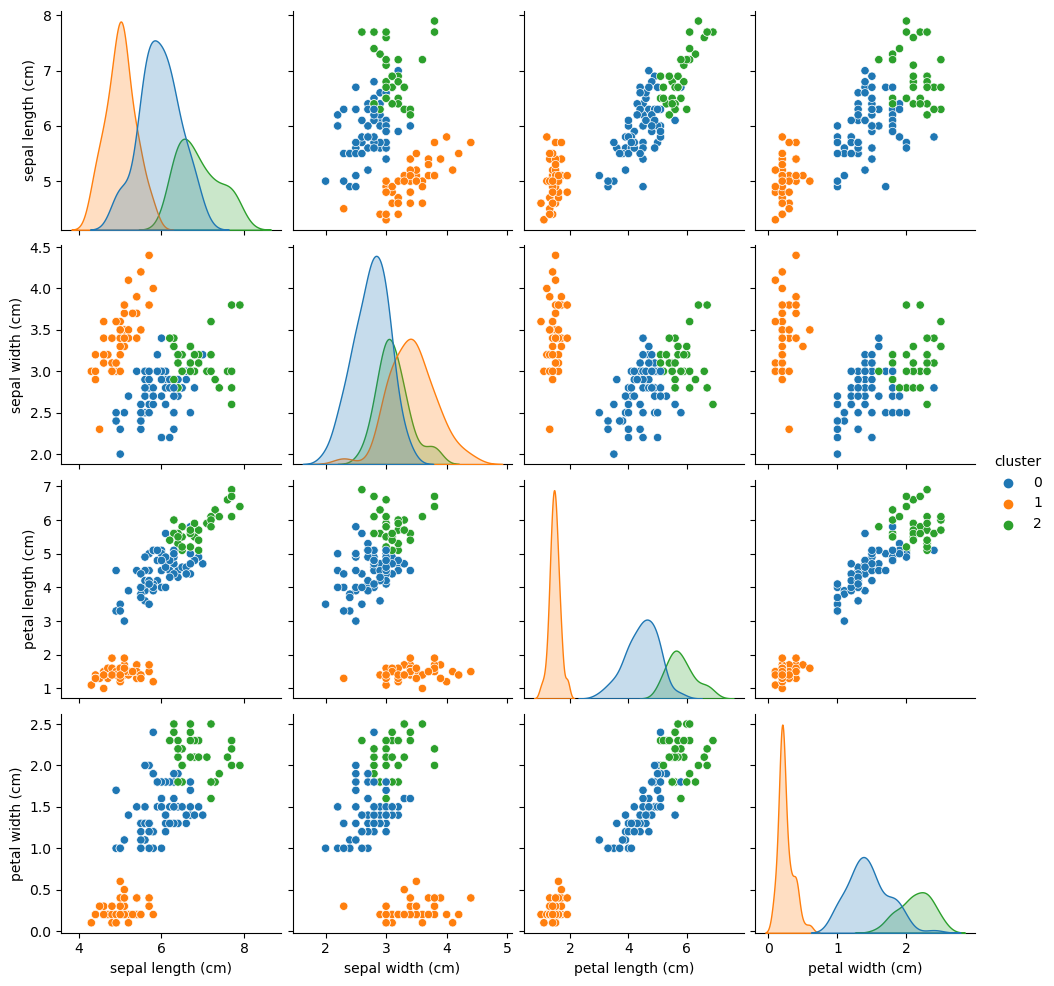

In [188]:
agglomerative = AgglomerativeClustering(n_clusters = 3)
hier_labels = agglomerative.fit_predict(X_scaled)

df['cluster'] = pd.Categorical(hier_labels)

# Visualizing the clusters using pairplot
sns.pairplot(df, hue='cluster')
plt.show()

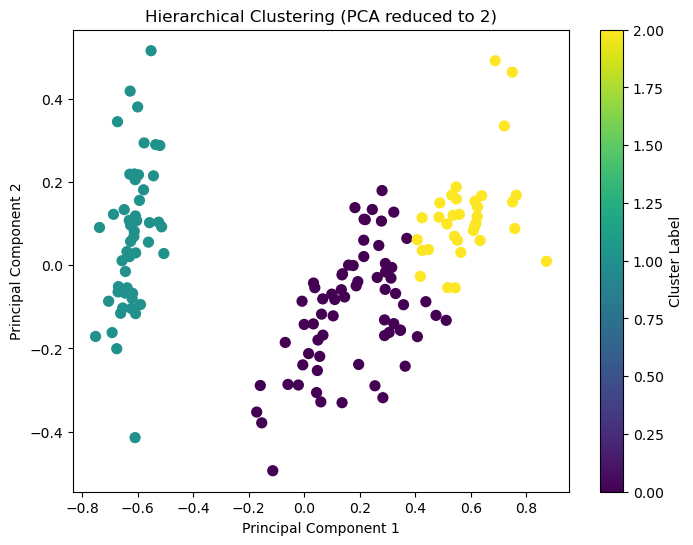

In [189]:
# Plot the clustered data (PCA reduced to 2)
plt.figure(figsize=(8, 6))
plt.scatter(pca_reduced[:, 0], pca_reduced[:, 1], c = hier_labels, cmap = 'viridis', s=50)
plt.title('Hierarchical Clustering (PCA reduced to 2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

### DBSCAN

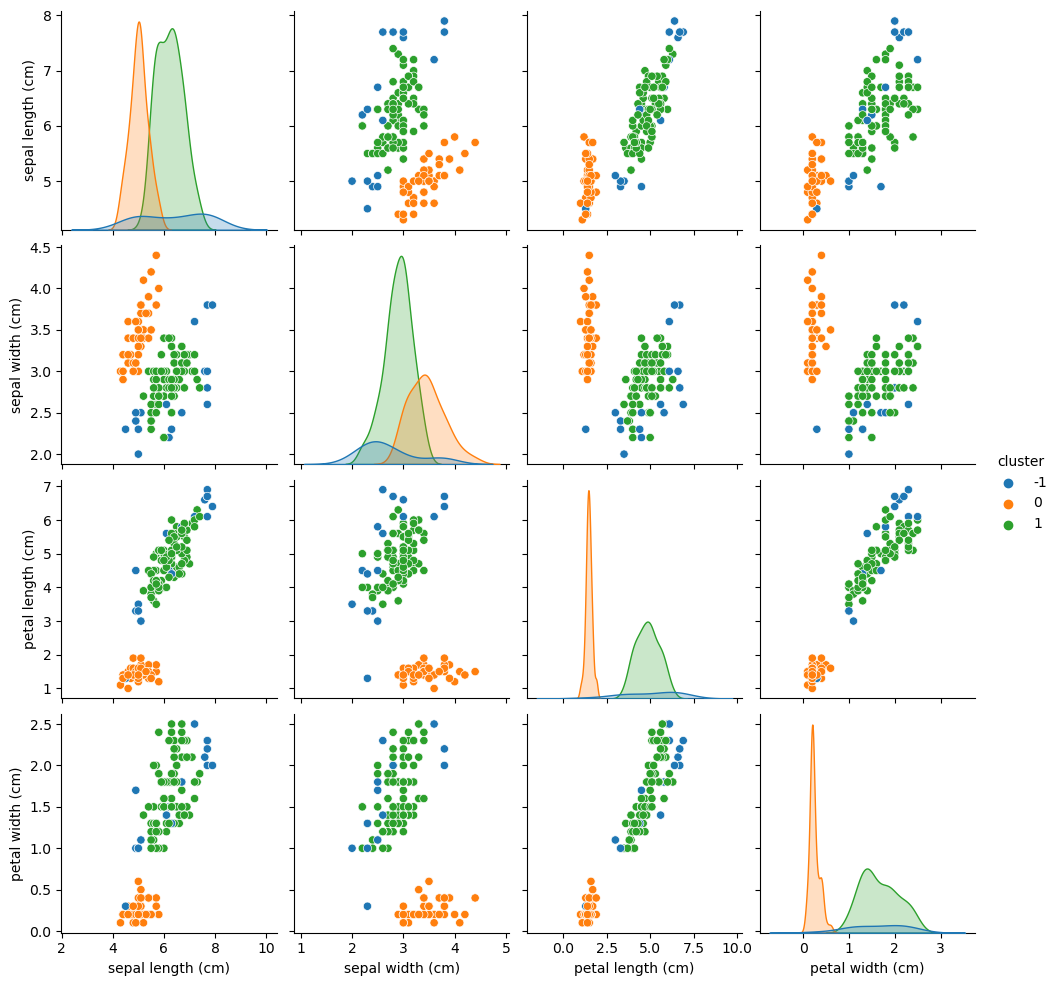

In [190]:
dbscan = DBSCAN(eps = 0.5, min_samples = 5)
dbscan_labels = dbscan.fit_predict(X)

df['cluster'] = pd.Categorical(dbscan_labels)

# Visualizing the clusters using pairplot
sns.pairplot(df, hue='cluster')
plt.show()

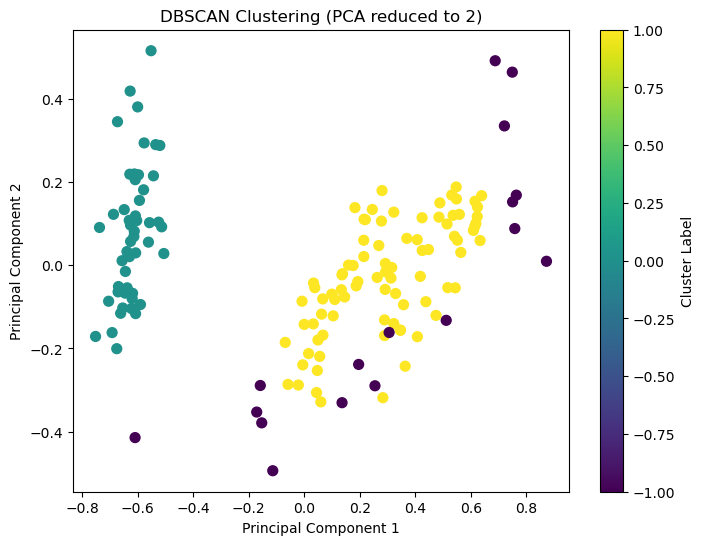

In [191]:
# Plot the clustered data (PCA reduced to 2)
plt.figure(figsize=(8, 6))
plt.scatter(pca_reduced[:, 0], pca_reduced[:, 1], c = dbscan_labels, cmap = 'viridis', s = 50)
plt.title('DBSCAN Clustering (PCA reduced to 2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

### Dunn index

In [192]:
def dunn_index(X, labels):
    unique_labels = np.unique(labels[labels != -1]) # Remove noises
    distances = pairwise_distances(X)
    intracluster_dists = np.array([
        distances[labels == label][:, labels == label].max() 
        for label in unique_labels if label != -1])
    intercluster_dists = np.array([
        distances[labels == label_i][:, labels == label_j].min() 
        for label_i in unique_labels for label_j in unique_labels if label_i < label_j])
    
    return intercluster_dists.min() / intracluster_dists.max()

# Calculate Dunn index
dunn_kmeans = dunn_index(X_scaled, k_means_labels)
dunn_hier = dunn_index(X_scaled, hier_labels)
dbscan = DBSCAN(eps = 0.3, min_samples = 2)
labels = dbscan.fit_predict(X_scaled)
dunn_dbscan = dunn_index(X_scaled, labels)

print(f"Dunn Index for K-Means: {dunn_kmeans:.3f}")
print(f"Dunn Index for Hierarchical: {dunn_hier:.3f}")
print(f"Dunn Index for DBSCAN with eps = 0.3 and min_samples = 2: {dunn_dbscan:.3f}")


Dunn Index for K-Means: 0.069
Dunn Index for Hierarchical: 0.113
Dunn Index for DBSCAN with eps = 0.3 and min_samples = 2: 0.358


### Hierarchical Clustering Dendrogram

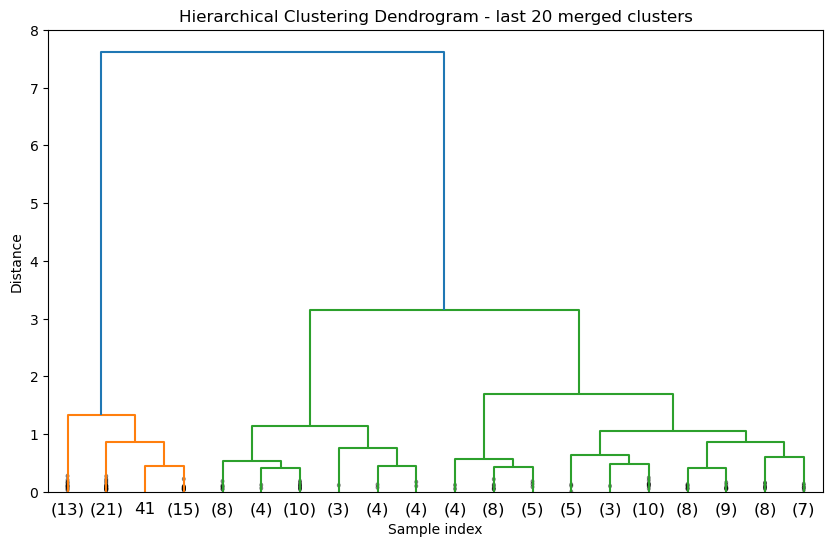

In [193]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering with ward
Z = linkage(X_scaled, method = 'ward') 

# Visualize dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode = 'lastp', p = 20, show_leaf_counts = True, show_contracted = True) # Show only the last 20 merged cluster
plt.title('Hierarchical Clustering Dendrogram - last 20 merged clusters')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()
